# Linear Regression with 3x
When we do Linear Regression with 3x (i.e., with 3
features $x_1, x_2, x_3$), we use the following equation

$$ \underline{y} = \sum_{j=1}^3
\alpha_{\underline{y}|\underline{x}_j}\; \underline{x}_j
+ \underline{\epsilon}_{\underline{y}}
$$

This can be viewed as one of the 4 equations (1 equation
for each node) of the linear SCM depicted below. In LR,
we do not assume any particular probability 
distribution for the nodes $x_j$ conditioned
on their parents, whereas here  we assume  linear relationships,
so this is only a special case of LR, but still instructive.

In [1]:
# this makes sure it starts looking for things from the scumpy folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\scumpy


In [2]:
from Graph import *
from CovMatCalculator import *

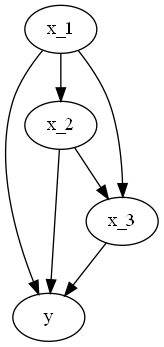

In [3]:
path = 'dot_atlas/linear-regression-3x.dot'
graph = Graph(path)
graph.draw(jupyter=True)

In [4]:
cal = CovMatCalculator(graph)
cal.calculate_cov_mat_sym()
cal.print_cov_mat_entries()

\begin{array}{l}
\left\langle\underline{x_1}, \underline{x_1}\right\rangle=\sigma_{\underline{\epsilon}_{\underline{x_1}}}^{2}
\\
\left\langle\underline{x_1}, \underline{x_2}\right\rangle=\alpha_{\underline{x_2}|\underline{x_1}} \sigma_{\underline{\epsilon}_{\underline{x_1}}}^{2}
\\
\left\langle\underline{x_1}, \underline{x_3}\right\rangle=\sigma_{\underline{\epsilon}_{\underline{x_1}}}^{2} \left(\alpha_{\underline{x_2}|\underline{x_1}} \alpha_{\underline{x_3}|\underline{x_2}} + \alpha_{\underline{x_3}|\underline{x_1}}\right)
\\
\left\langle\underline{x_1}, \underline{y}\right\rangle=\sigma_{\underline{\epsilon}_{\underline{x_1}}}^{2} \left(\alpha_{\underline{x_2}|\underline{x_1}} \alpha_{\underline{x_3}|\underline{x_2}} \alpha_{\underline{y}|\underline{x_3}} + \alpha_{\underline{x_2}|\underline{x_1}} \alpha_{\underline{y}|\underline{x_2}} + \alpha_{\underline{x_3}|\underline{x_1}} \alpha_{\underline{y}|\underline{x_3}} + \alpha_{\underline{y}|\underline{x_1}}\right)
\\
\left\langle\un

In [5]:
cal.print_jacobian_entries()

\begin{array}{l}
\frac{\partial\underline{x_1}}{\partial\underline{x_1}}=1
\\
\frac{\partial\underline{x_1}}{\partial\underline{x_2}}=\frac{\alpha_{\underline{x_2}|\underline{x_1}} \sigma_{\underline{\epsilon}_{\underline{x_1}}}^{2}}{\alpha_{\underline{x_2}|\underline{x_1}}^{2} \sigma_{\underline{\epsilon}_{\underline{x_1}}}^{2} + \sigma_{\underline{\epsilon}_{\underline{x_2}}}^{2}}
\\
\frac{\partial\underline{x_1}}{\partial\underline{x_3}}=\frac{\sigma_{\underline{\epsilon}_{\underline{x_1}}}^{2} \left(\alpha_{\underline{x_2}|\underline{x_1}} \alpha_{\underline{x_3}|\underline{x_2}} + \alpha_{\underline{x_3}|\underline{x_1}}\right)}{\alpha_{\underline{x_3}|\underline{x_2}}^{2} \sigma_{\underline{\epsilon}_{\underline{x_2}}}^{2} + \sigma_{\underline{\epsilon}_{\underline{x_1}}}^{2} \left(\alpha_{\underline{x_2}|\underline{x_1}} \alpha_{\underline{x_3}|\underline{x_2}} + \alpha_{\underline{x_3}|\underline{x_1}}\right)^{2} + \sigma_{\underline{\epsilon}_{\underline{x_3}}}^{2}}
\\
\frac{\

In [6]:
from GainsCalculator import *
cal = GainsCalculator(graph)
cal.calculate_gains_sym()
cal.print_gains()

\begin{array}{l}
\alpha_{\underline{x_2}|\underline{x_1}} = \frac{\left\langle\underline{x_1},\underline{x_2}\right\rangle}{\left\langle\underline{x_1},\underline{x_1}\right\rangle}
\\
\alpha_{\underline{x_3}|\underline{x_1}} = \frac{- \left\langle\underline{x_1},\underline{x_2}\right\rangle \left\langle\underline{x_2},\underline{x_3}\right\rangle + \left\langle\underline{x_1},\underline{x_3}\right\rangle \left\langle\underline{x_2},\underline{x_2}\right\rangle}{\left\langle\underline{x_1},\underline{x_1}\right\rangle \left\langle\underline{x_2},\underline{x_2}\right\rangle - \left\langle\underline{x_1},\underline{x_2}\right\rangle^{2}}
\\
\alpha_{\underline{x_3}|\underline{x_2}} = \frac{\left\langle\underline{x_1},\underline{x_1}\right\rangle \left\langle\underline{x_2},\underline{x_3}\right\rangle - \left\langle\underline{x_1},\underline{x_2}\right\rangle \left\langle\underline{x_1},\underline{x_3}\right\rangle}{\left\langle\underline{x_1},\underline{x_1}\right\rangle \left\langle\un